In [97]:
import os
from scipy import misc
import imageio
from IPython.display import Image
import numpy as np
import math
import matplotlib.pyplot as plt


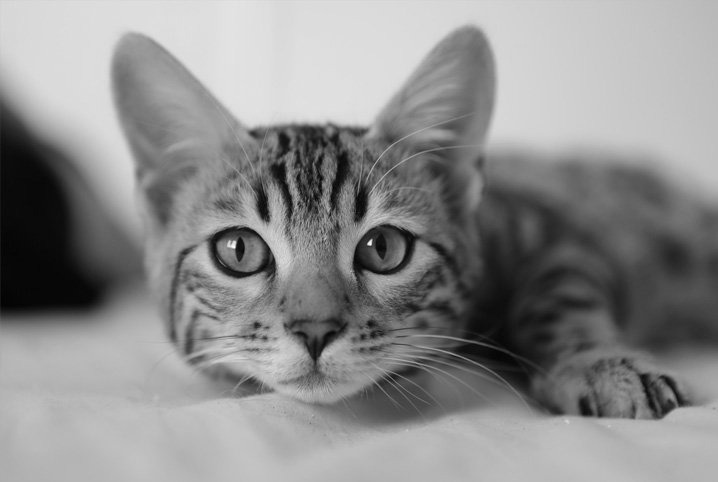

In [22]:
Image(filename='gato.jpg') 

In [17]:
im = imageio.imread('gato.bmp')

In [28]:
tx = np.array([ np.array([pixel[0] for pixel in line]) for line in im])


In [39]:
print('Dimensão da imagem em escala de cinza: ',tx.shape)
print('\n', tx.shape[0] * tx.shape[1] , "unidades de pixel")

Dimensão da imagem em escala de cinza:  (482, 718)

 346076 unidades de pixel


In [40]:
print(np.amax(tx))
print(np.amin(tx))
print('Concluímos então que é a escala de cinza de 0 a 255')

251
0


In [42]:
tx_sh = np.array([ np.array([pixel - 128 for pixel in line]) for line in tx])

In [72]:
# corte de 8x8 na imagem
tx_sh_ct = tx_sh[:8,:8]
tx_sh_ct

array([[79, 81, 83, 83, 82, 82, 82, 83],
       [84, 86, 88, 88, 87, 87, 87, 88],
       [84, 85, 87, 88, 87, 86, 87, 87],
       [82, 84, 86, 86, 85, 85, 85, 86],
       [84, 86, 88, 88, 87, 87, 87, 88],
       [84, 86, 88, 89, 88, 87, 88, 88],
       [83, 85, 87, 87, 87, 86, 86, 87],
       [84, 86, 88, 89, 88, 87, 87, 88]])

In [53]:
def make_c(N):
    C = np.zeros( (N, N) )
    for u in range(N):
        for v in range(N):
            if(u==0):
                C[u][v] = math.sqrt(1/float(N))
            else:
                C[u][v] = math.sqrt(2/float(N)) * math.cos( ((2*v + 1) * math.pi * u) / (2* float(N)) )
    return C

In [54]:
make_c(4)

array([[ 0.5       ,  0.5       ,  0.5       ,  0.5       ],
       [ 0.65328148,  0.27059805, -0.27059805, -0.65328148],
       [ 0.5       , -0.5       , -0.5       ,  0.5       ],
       [ 0.27059805, -0.65328148,  0.65328148, -0.27059805]])

In [49]:
math.pi

3.141592653589793

In [156]:
cut = 450

tx_sh_ct = tx_sh[:cut,:cut]

C = make_c(cut)

np.set_printoptions(suppress=True)
np.set_printoptions(precision=2)

transformado = np.dot(np.dot(C, tx_sh_ct), C.transpose())

print(transformado)

for ix, line in enumerate(transformado):
    for ix_2, pixel in enumerate(line):
        if(abs(pixel) <1000):
            transformado[ix][ix_2] = 0
        else:
            transformado[ix][ix_2] = int(transformado[ix][ix_2])
print('\n', transformado)

retornado = np.dot(np.dot(C.transpose(), transformado), C)
print('\n', retornado)

print('\n', tx_sh_ct-retornado)

[[ 7022.68   613.19 -7154.05 ...    -2.73     6.07    -0.53]
 [ 7863.37 -3197.03  1613.9  ...    -3.38    -1.75     2.36]
 [18031.38  4544.96  4688.81 ...    -1.45    -4.27    -0.32]
 ...
 [   -2.94     4.66    -3.63 ...     0.82    -0.2     -0.29]
 [    1.79    -2.57     3.4  ...    -1.83     2.12    -1.77]
 [   -0.69    -4.71     3.   ...    -0.5     -0.56     1.96]]

 [[ 7022.     0. -7154. ...     0.     0.     0.]
 [ 7863. -3197.  1613. ...     0.     0.     0.]
 [18031.  4544.  4688. ...     0.     0.     0.]
 ...
 [    0.     0.     0. ...     0.     0.     0.]
 [    0.     0.     0. ...     0.     0.     0.]
 [    0.     0.     0. ...     0.     0.     0.]]

 [[105.2  105.15 105.04 ... 123.77 124.   124.12]
 [105.11 105.06 104.95 ... 123.63 123.86 123.98]
 [104.93 104.87 104.77 ... 123.35 123.58 123.7 ]
 ...
 [ 20.35  20.46  20.69 ...  62.57  62.53  62.51]
 [ 20.13  20.24  20.47 ...  62.78  62.75  62.73]
 [ 20.02  20.13  20.36 ...  62.89  62.86  62.84]]

 [[-26.2  -24.15 -22.04

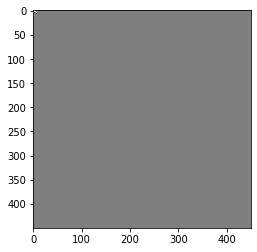

In [157]:
imgplot = plt.imshow(transformado, cmap='gray', vmin=-128, vmax=128)


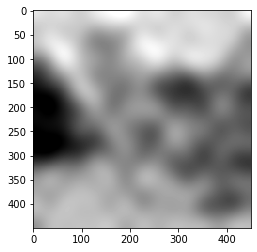

In [158]:
imgplot = plt.imshow(retornado, cmap='gray', vmin=-128, vmax=128)


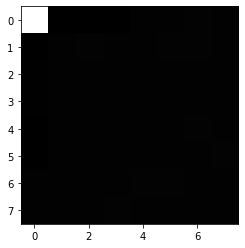